In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [236]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

In [160]:
df=pd.read_csv('train.csv')

In [152]:
df=df.drop(["Unnamed: 0"], axis=1)

In [153]:
df

,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,AAPL,2023-10-01,0.0605,0.8815,0.0575,-0.4582,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
1,AAPL,2023-10-02,0.0410,0.8930,0.0660,0.2672,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
2,AAPL,2023-10-03,0.0215,0.9080,0.0705,0.9749,172.259995,173.630005,170.820007,172.399994,172.173172,4.959460e+07
3,AAPL,2023-10-04,0.0170,0.8830,0.1000,0.9827,171.089996,174.210007,170.970001,173.660004,173.431519,5.302030e+07
4,AAPL,2023-10-05,0.0180,0.8855,0.0965,0.9552,173.789993,175.449997,172.679993,174.910004,174.679871,4.852790e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
501,XOM,2023-10-22,0.0350,0.8740,0.0910,0.9863,111.393331,111.746666,109.383334,109.993332,108.996633,1.960327e+07
502,XOM,2023-10-23,0.0350,0.8740,0.0910,0.9863,110.629997,110.959999,108.680000,109.449997,108.458221,1.818500e+07
503,XOM,2023-10-24,0.0285,0.8685,0.1025,0.9935,109.699997,109.820000,108.120003,108.389999,107.407829,1.678610e+07
504,XOM,2023-10-25,0.0265,0.8590,0.1145,0.9820,108.519997,109.500000,108.129997,108.589996,107.606010,2.204730e+07


In [112]:
stocks=df.stock.unique()

In [174]:
df=pd.read_csv('train.csv')

In [175]:
df

,Unnamed: 0,stock,date,neg,neu,pos,compound,open,high,low,close,adj close,volume
0,0,AAPL,2023-10-01,0.0605,0.8815,0.0575,-0.4582,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
1,1,AAPL,2023-10-02,0.0410,0.8930,0.0660,0.2672,171.220001,174.300003,170.929993,173.750000,173.521393,5.216450e+07
2,2,AAPL,2023-10-03,0.0215,0.9080,0.0705,0.9749,172.259995,173.630005,170.820007,172.399994,172.173172,4.959460e+07
3,3,AAPL,2023-10-04,0.0170,0.8830,0.1000,0.9827,171.089996,174.210007,170.970001,173.660004,173.431519,5.302030e+07
4,4,AAPL,2023-10-05,0.0180,0.8855,0.0965,0.9552,173.789993,175.449997,172.679993,174.910004,174.679871,4.852790e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,XOM,2023-10-22,0.0350,0.8740,0.0910,0.9863,111.393331,111.746666,109.383334,109.993332,108.996633,1.960327e+07
502,502,XOM,2023-10-23,0.0350,0.8740,0.0910,0.9863,110.629997,110.959999,108.680000,109.449997,108.458221,1.818500e+07
503,503,XOM,2023-10-24,0.0285,0.8685,0.1025,0.9935,109.699997,109.820000,108.120003,108.389999,107.407829,1.678610e+07
504,504,XOM,2023-10-25,0.0265,0.8590,0.1145,0.9820,108.519997,109.500000,108.129997,108.589996,107.606010,2.204730e+07


## CV of Baseline model -- Supriyo

In [376]:
df=pd.read_csv('train.csv')
cv = TimeSeriesSplit(4, test_size=4)    


base_rmses = np.zeros((4))


i = 0
for train_index, test_index in cv.split(df[df.stock=='MA']):
    tt = df.iloc[train_index]
    ho = df.iloc[test_index]
    
    pred = tt.volume.mean() * np.ones(len(ho))
        
    base_rmses[i] = np.sqrt(mean_squared_error(ho.volume.values, pred))

    i = i + 1

## Cross validation LinReg -- Supriyo

In [375]:
df=pd.read_csv('train.csv')
cv = TimeSeriesSplit(4, test_size=4)    

LR_rmses = np.zeros((4))


i = 0


for train_index, test_index in cv.split(df[df.stock=='MA']):
    tt = df.iloc[train_index]
    ho = df.iloc[test_index]
    for lag in range(1, 2):  # Adjust the lag range as needed
        tt[f'volume_Lag_{lag}'] = tt['volume'].shift(lag)
    for lag in range(1, 2):  # Adjust the lag range as needed
        ho[f'volume_Lag_{lag}'] = ho['volume'].shift(lag)

    features = ['neg', 'pos', 'compound', 'volume_Lag_1']#, 'volume_Lag_2']#, 'volume_Lag_3', 'volume_Lag_4']
    target = 'volume'
    tt = tt.interpolate(method = 'linear', inplace = False, limit_direction = "both")
    ho = ho.interpolate(method = 'linear', inplace = False, limit_direction = "both")
    
    model = sm.OLS(tt[target], tt[features])
    results = model.fit()
    pred = results.predict(ho[features])
    
# Display regression summary
    
 #   print(results.summary())
    LR_rmses[i] = np.sqrt(mean_squared_error(ho.volume.values, pred))
    
    i = i + 1

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/973356843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tt[f'volume_Lag_{lag}'] = tt['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/973356843.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ho[f'volume_Lag_{lag}'] = ho['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/973356843.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [364]:
pred

21    5.854548e+07
22    5.872211e+07
23    5.300839e+07
24    4.272710e+07
dtype: float64

In [365]:
ho.volume.values

array([58716500., 55980100., 43816600., 57157000.])

In [377]:
LR_rmses


array([6030060.33323289, 4392286.72067713, 7596545.98683888,
       1402675.82858936])

In [380]:
np.mean((LR_rmses))

4855392.217334564

In [378]:
base_rmses

array([7252984.06423943, 4025263.96752873, 6078173.13921525,
       8930424.74329939])

In [379]:
np.mean((base_rmses))

6571711.4785707

## Linear Reg for Volume -- Supriyo

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


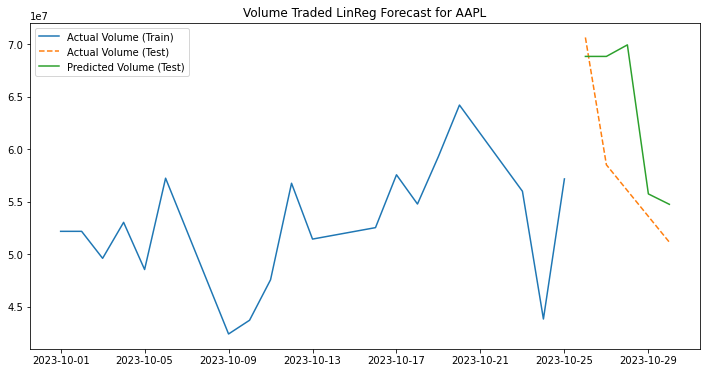

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


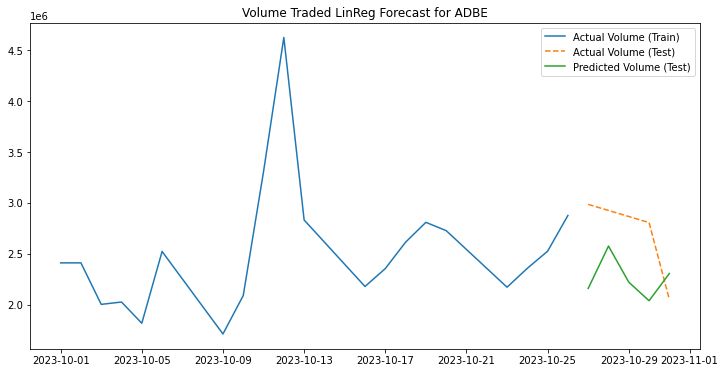

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


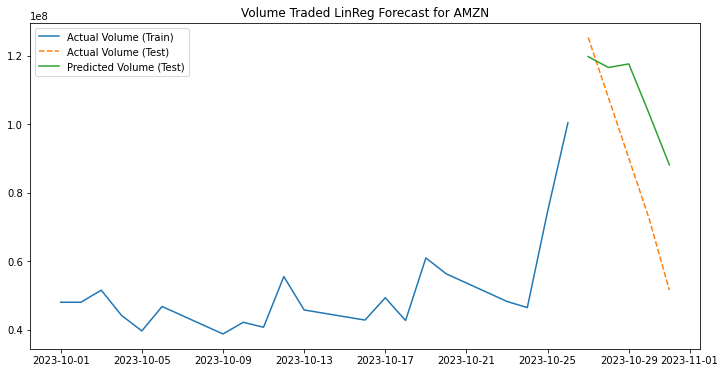

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


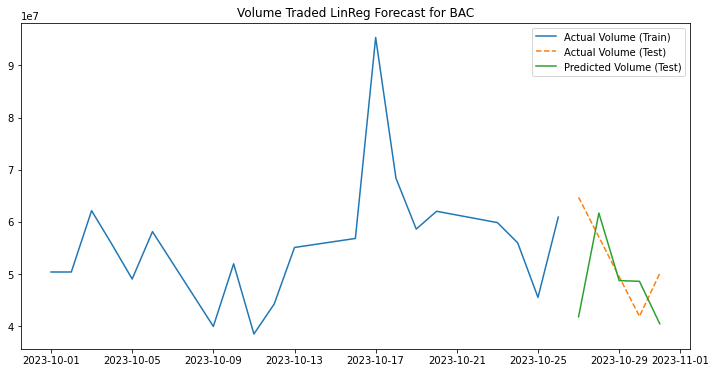

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


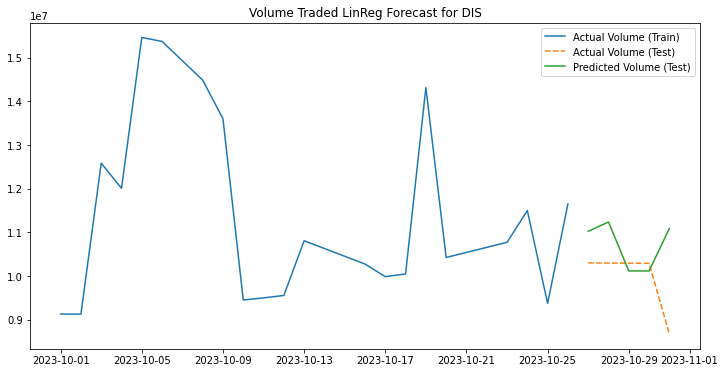

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


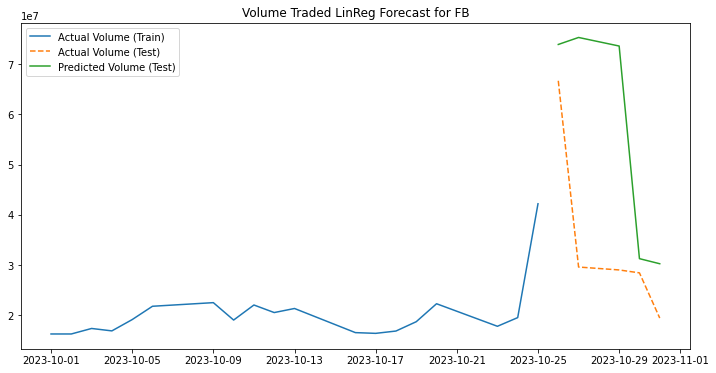

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


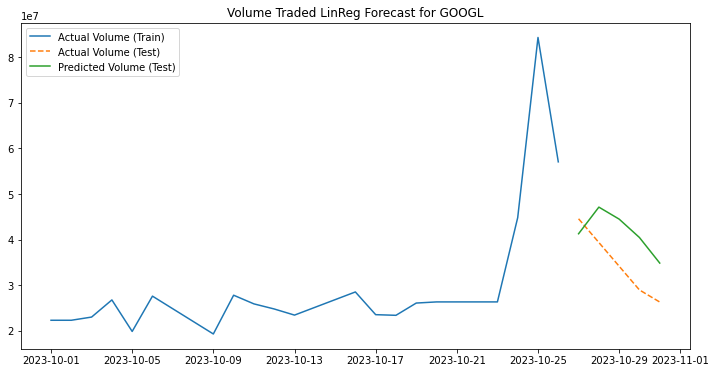

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


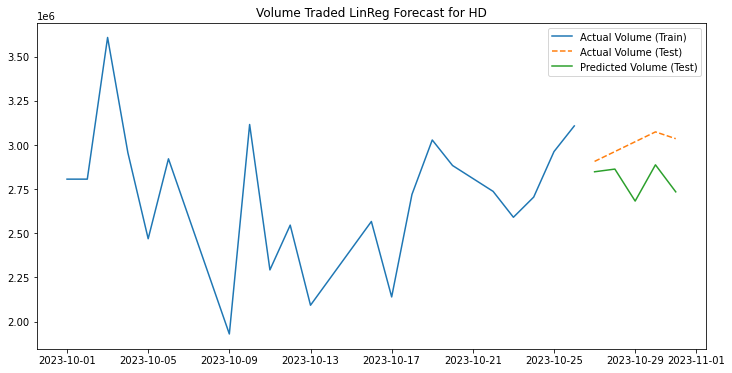

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


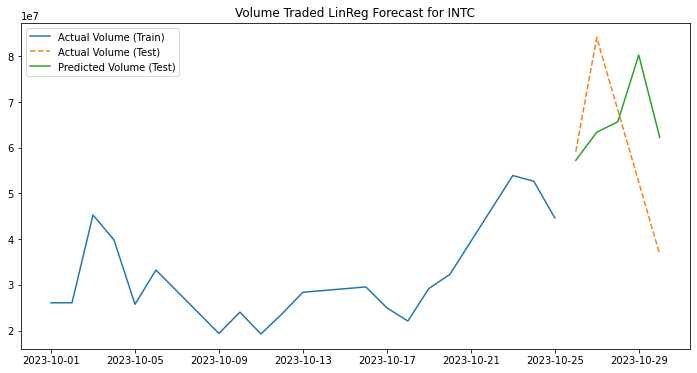

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


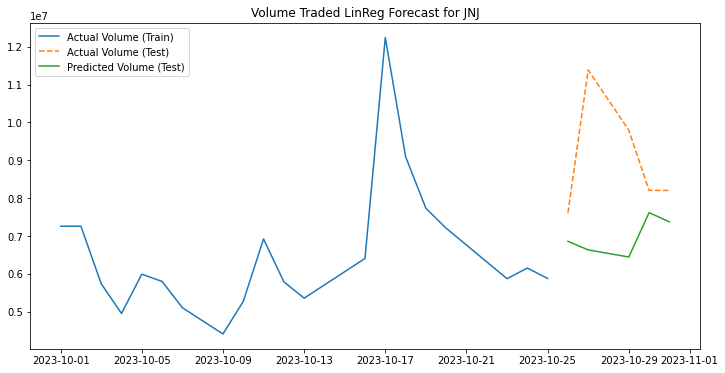

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


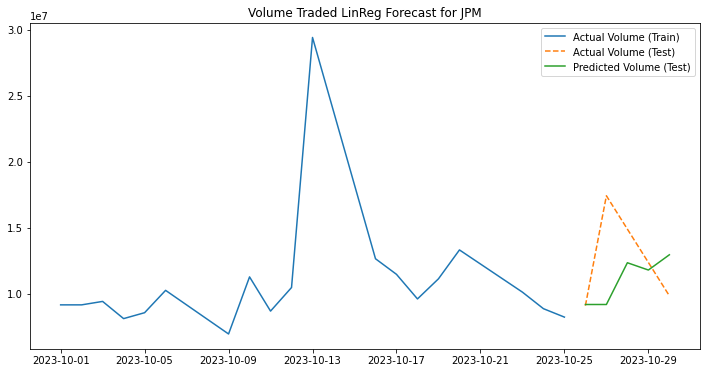

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


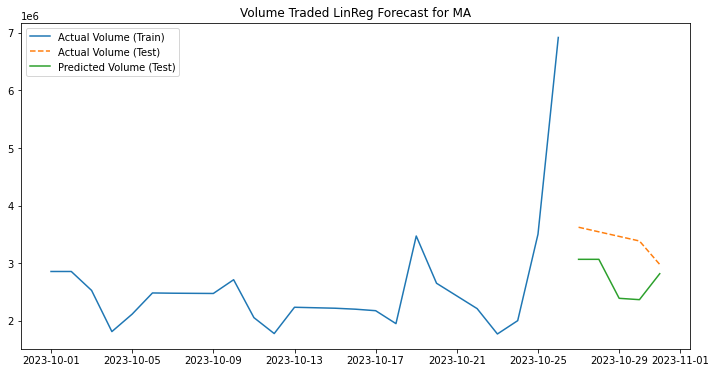

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


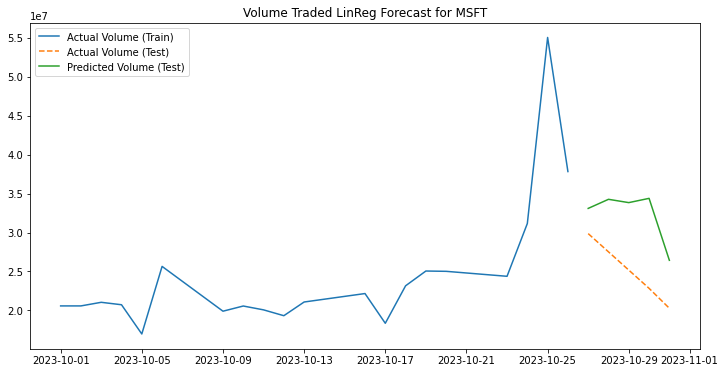

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


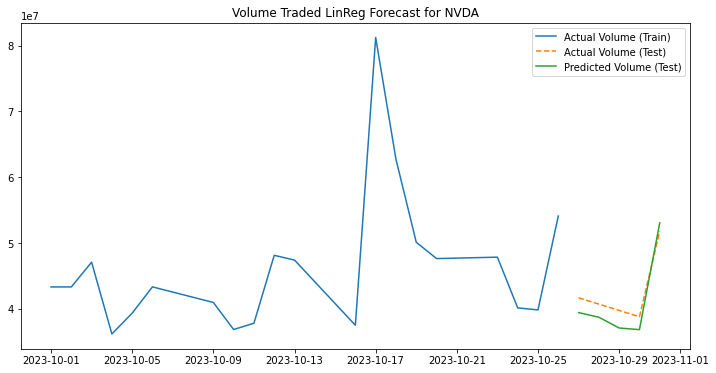

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


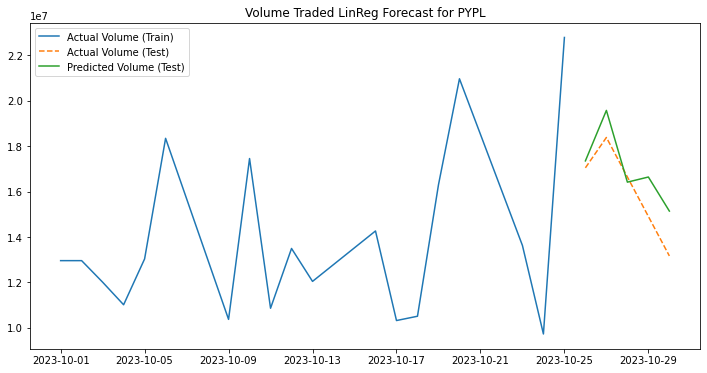

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


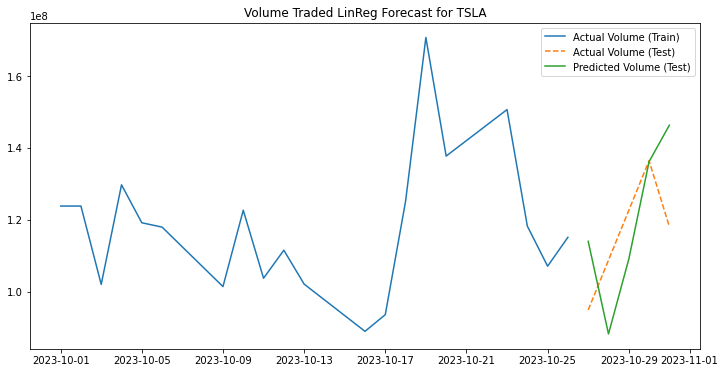

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


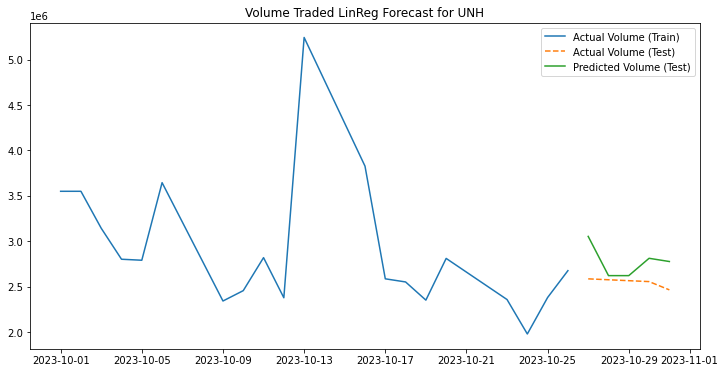

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


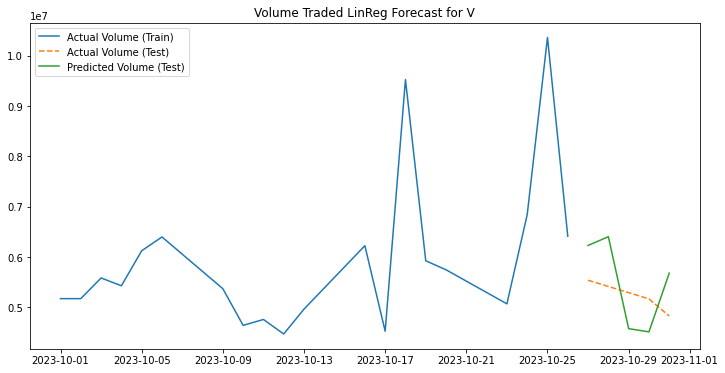

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


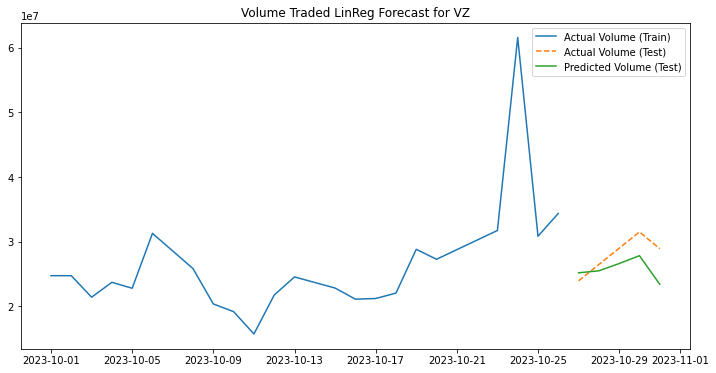

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/1622565072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)


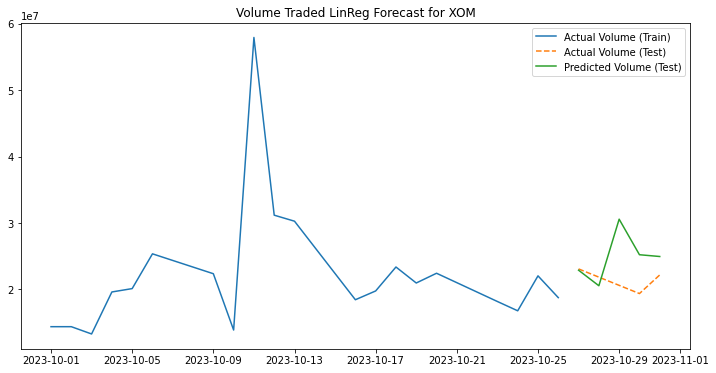

In [356]:
## Linear regression model -- Supriyo

url1 = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
url2 = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/test.csv'

df1 = pd.read_csv(url1, parse_dates=['date'], index_col='date')
df2 = pd.read_csv(url2, parse_dates=['date'], index_col='date')

stocks=df1.stock.unique()

for s in stocks:
  #  stock_data = df[df['stock'] == s]
   # ts = stock_data['volume']
#    start_date = '2023-10-01'
 #   end_date_train = '2023-10-26'
  #  end_date_test = '2023-10-31'
    df_stock_train = df1[df1['stock'] == s]# & (df.index >= start_date) & (df.index <= end_date_train)]
    df_stock_test = df2[df2['stock'] == s]# #& (df.index > end_date_train) & (df.index <= end_date_test)]

    for lag in range(2, 3):  # Adjust the lag range as needed
        df_stock_train[f'volume_Lag_{lag}'] = df_stock_train['volume'].shift(lag)
    for lag in range(2, 3):  # Adjust the lag range as needed
        df_stock_test[f'volume_Lag_{lag}'] = df_stock_test['volume'].shift(lag)

    featuresv = ['neg', 'pos', 'compound', 'volume_Lag_2']#, 'volume_Lag_2']#, 'volume_Lag_3', 'volume_Lag_4']

    targetv = 'volume'

    df_stock_train = df_stock_train.interpolate(method = 'linear', inplace = False, limit_direction = "both")
    df_stock_test = df_stock_test.interpolate(method = 'linear', inplace = False, limit_direction = "both")
# Fit model for volume prediction    
    model = sm.OLS(df_stock_train[targetv], df_stock_train[featuresv])
    results = model.fit()
    pred = results.predict(df_stock_test[featuresv])
    
    ma_rmses = np.sqrt(mean_squared_error(df_stock_test.volume.values, pred))
    
    with PdfPages('volume_prediction_linearReg_'+str(s)+'.pdf') as pdf:
        plt.figure(figsize=(12, 6))
        plt.plot(df_stock_train['volume'], label='Actual Volume (Train)')
        plt.plot(df_stock_test['volume'], label='Actual Volume (Test)', linestyle='--')
        plt.plot(pred, label='Predicted Volume (Test)')
        plt.title('Volume Traded LinReg Forecast for '+str(s))
        plt.legend()
        pdf.savefig()
        plt.show()


## LinReg for close price

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


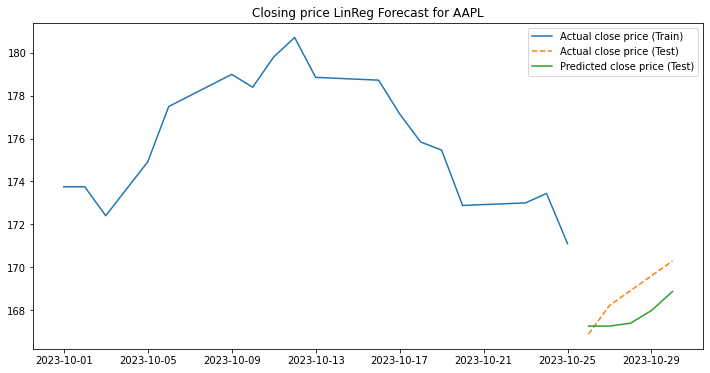

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


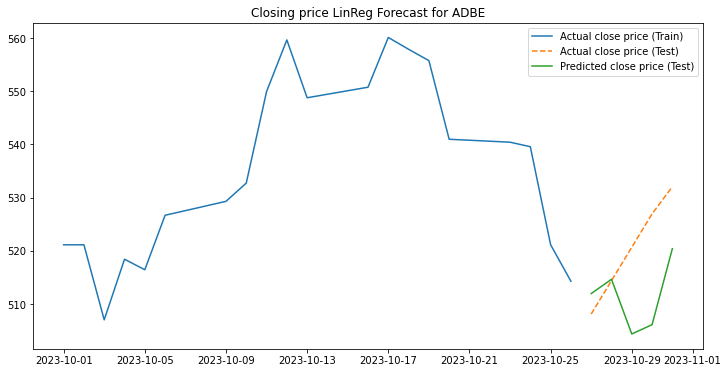

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


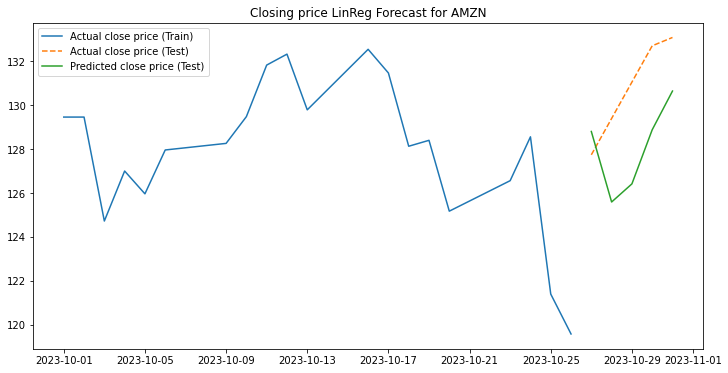

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


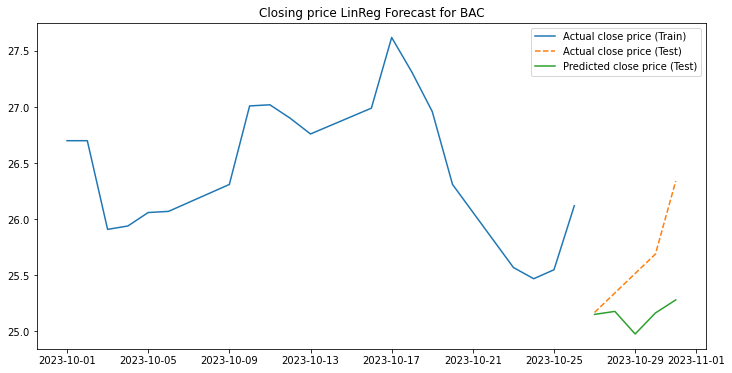

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


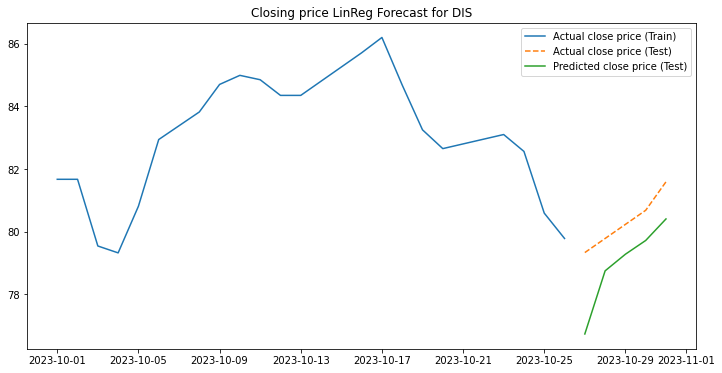

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


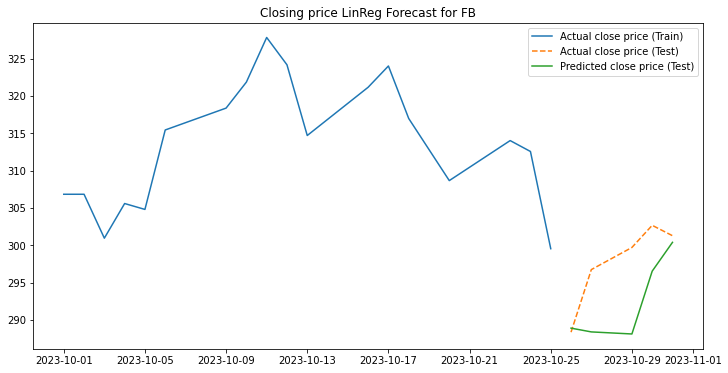

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


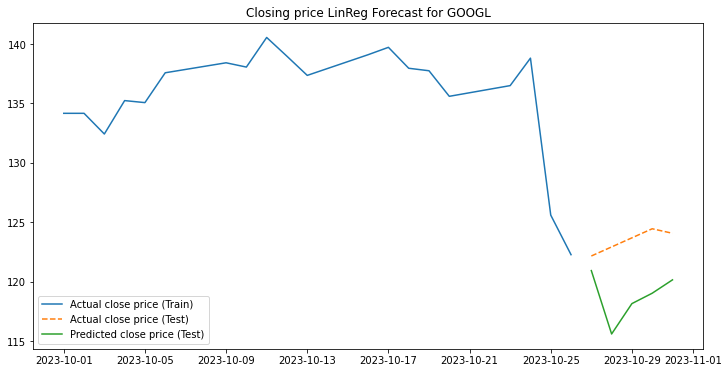

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


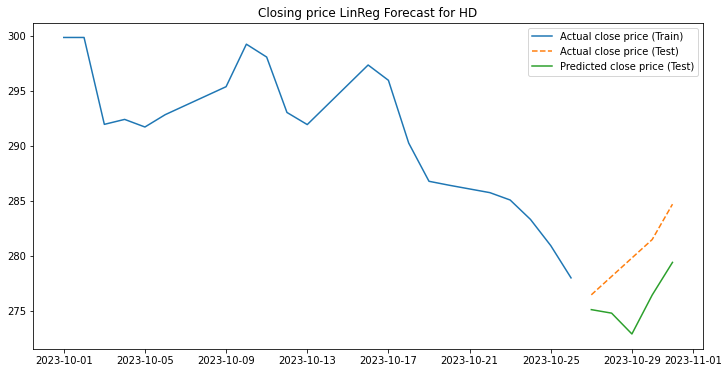

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


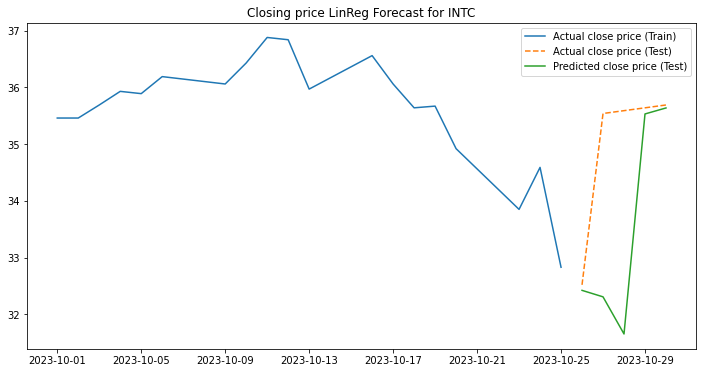

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


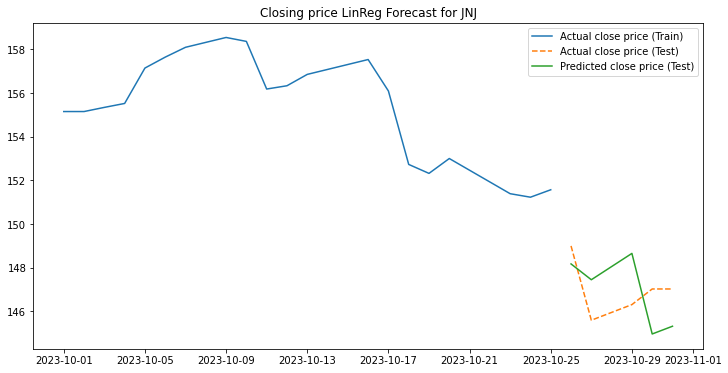

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


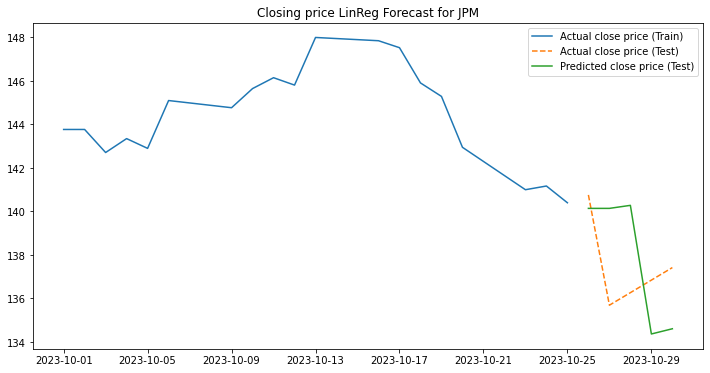

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


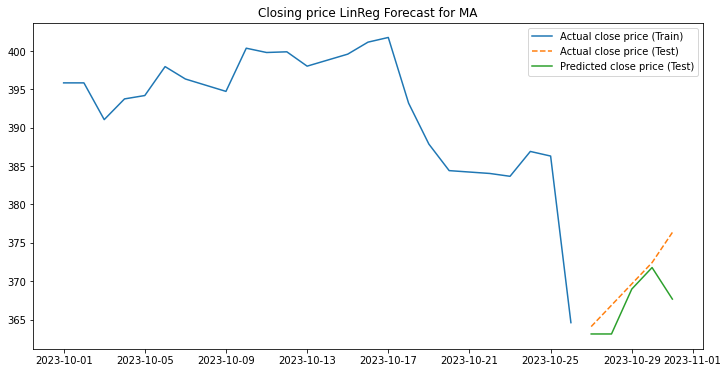

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


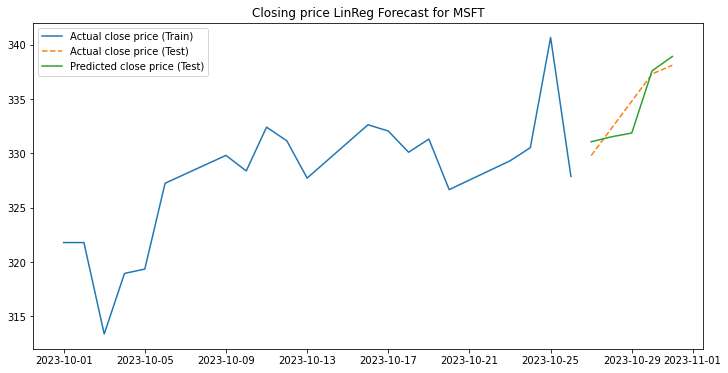

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


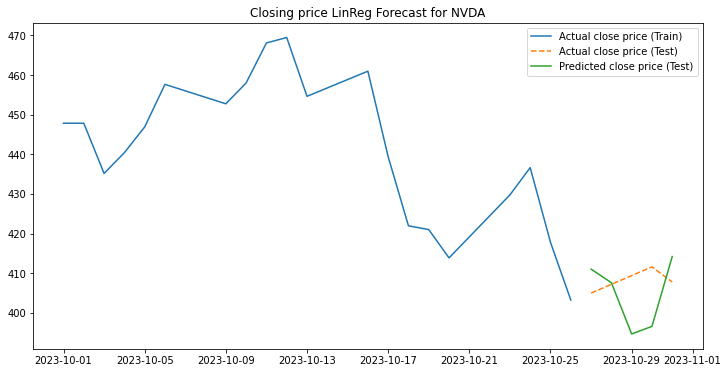

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


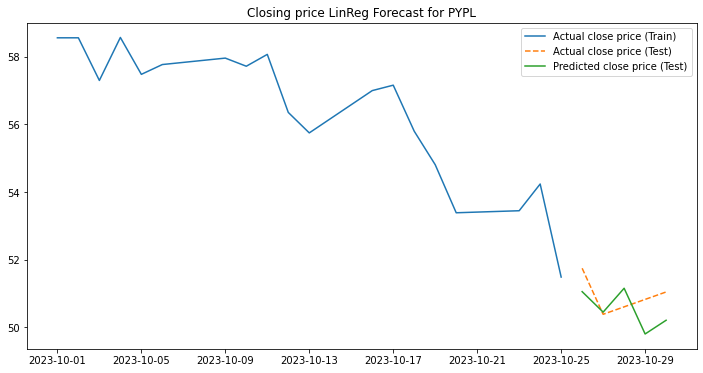

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


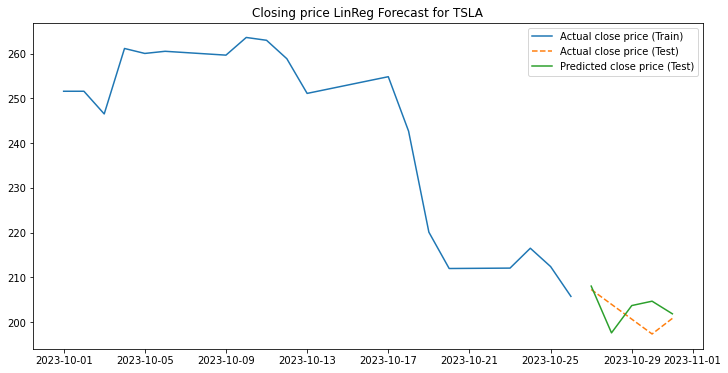

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


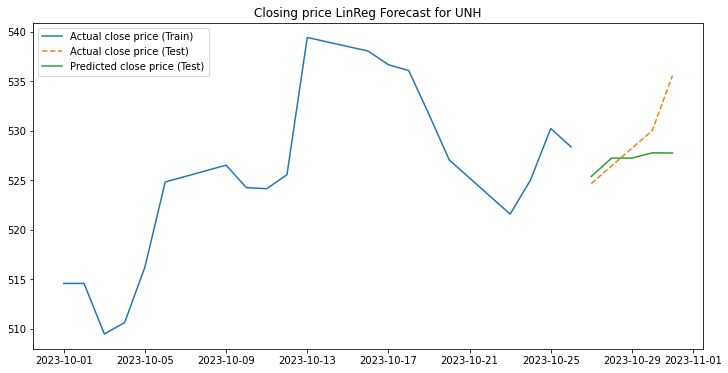

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


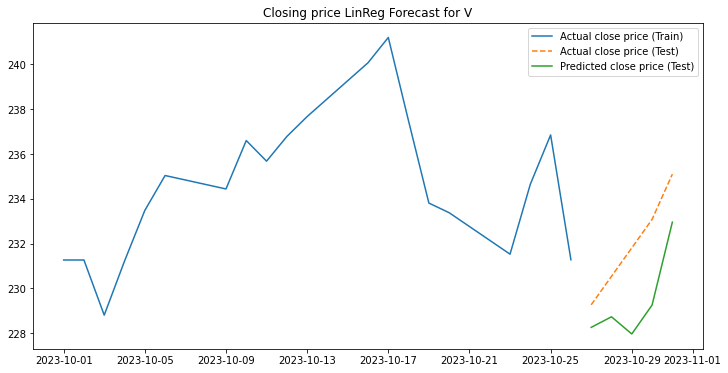

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


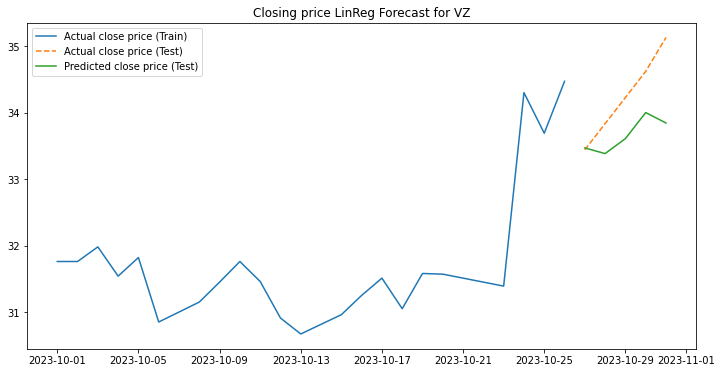

/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
/var/folders/ds/3fw7k5s90y92tk9pf_g79p6m0000gn/T/ipykernel_25728/987372931.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)


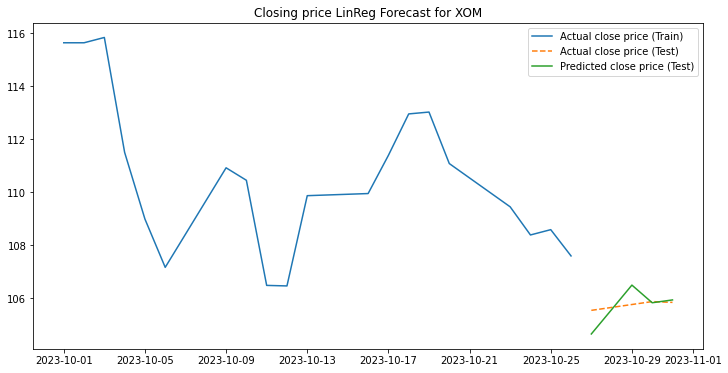

In [358]:
## Linear regression model -- Supriyo

url1 = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
url2 = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/test.csv'

df1 = pd.read_csv(url1, parse_dates=['date'], index_col='date')
df2 = pd.read_csv(url2, parse_dates=['date'], index_col='date')

stocks=df1.stock.unique()

for s in stocks:
  #  stock_data = df[df['stock'] == s]
   # ts = stock_data['volume']
#    start_date = '2023-10-01'
 #   end_date_train = '2023-10-26'
  #  end_date_test = '2023-10-31'
    df_stock_train = df1[df1['stock'] == s]# & (df.index >= start_date) & (df.index <= end_date_train)]
    df_stock_test = df2[df2['stock'] == s]# #& (df.index > end_date_train) & (df.index <= end_date_test)]

    for lag in range(2, 3):  # Adjust the lag range as needed
        df_stock_train[f'close_price_Lag_{lag}'] = df_stock_train['close'].shift(lag)
    for lag in range(2, 3):  # Adjust the lag range as needed
        df_stock_test[f'close_price_Lag_{lag}'] = df_stock_test['close'].shift(lag)

    featuresp = ['neg', 'pos', 'compound', 'close_price_Lag_2']#, 'volume_Lag_2']#, 'volume_Lag_3', 'volume_Lag_4']

    targetp = 'close'

    df_stock_train = df_stock_train.interpolate(method = 'linear', inplace = False, limit_direction = "both")
    df_stock_test = df_stock_test.interpolate(method = 'linear', inplace = False, limit_direction = "both")

    # Fit  model for open/close prices

    model_price = sm.OLS(df_stock_train[targetp], df_stock_train[featuresp])
    fit_model_price = model_price.fit()
    pred_price = fit_model_price.predict(df_stock_test[featuresp])
    
    with PdfPages('Close_price_prediction_linearReg_'+str(s)+'.pdf') as pdf:
        plt.figure(figsize=(12, 6))
        plt.plot(df_stock_train['close'], label='Actual close price (Train)')
        plt.plot(df_stock_test['close'], label='Actual close price (Test)', linestyle='--')
        plt.plot(pred_price, label='Predicted close price (Test)')
        plt.title('Closing price LinReg Forecast for '+str(s))
        plt.legend()
        pdf.savefig()
        plt.show()


In [353]:
df_stock_test

,Unnamed: 0,stock,neg,neu,pos,compound,open,high,low,close,adj close,volume,volume_Lag_2,price_Lag_2
date,,,,,,,,,,,,,,
2023-10-26,0,AAPL,0.0445,0.8575,0.098,0.9924,170.369995,171.380005,165.669998,166.889999,166.670425,7.062530e+07,7.062530e+07,166.889999
2023-10-27,1,AAPL,0.0445,0.8575,0.098,0.9924,166.910004,168.960007,166.830002,168.220001,167.998672,5.849910e+07,7.062530e+07,166.889999
2023-10-28,2,AAPL,0.0630,0.8520,0.085,0.7656,167.613337,169.696671,167.510000,168.909998,168.687759,5.604307e+07,7.062530e+07,166.889999
2023-10-29,3,AAPL,0.0220,0.8930,0.085,0.9895,168.316671,170.433334,168.189997,169.599996,169.376846,5.358703e+07,5.849910e+07,168.220001
2023-10-30,4,AAPL,0.0150,0.8685,0.117,0.9913,169.020004,171.169998,168.869995,170.289993,170.065933,5.113100e+07,5.604307e+07,168.909998


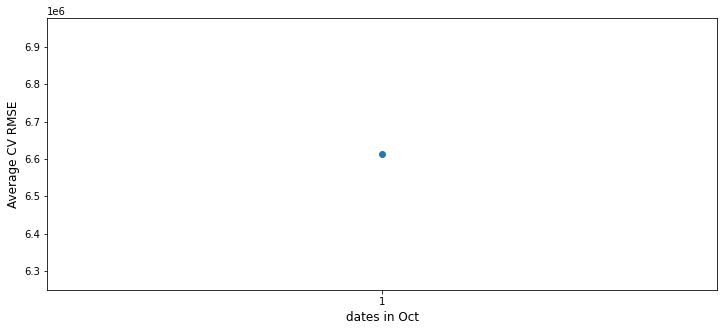

In [139]:
plt.figure(figsize=(12,5))

plt.scatter(range(start,end), np.mean(ma_rmses, axis=0))

plt.xlabel("dates in Oct", fontsize=12)
plt.ylabel("Average CV RMSE", fontsize=12)

plt.xticks(range(start, end, 3), fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## ARIMA model from Hy

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/pytho

Mean Squared Error: 3960292881226.581


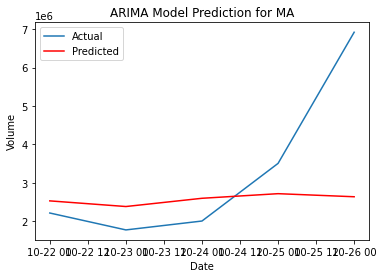

In [233]:
import pandas as pd
import ssl
from urllib.request import urlopen

ssl._create_default_https_context = ssl._create_unverified_context

url = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the dataset from Supriyo's GitHub 
url = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
df = pd.read_csv(url, parse_dates=['date'], index_col='date')


symbol = 'MA' 

stock_data = df[df['stock'] == symbol]
ts = stock_data['volume']

train_size = int(len(ts) * 0.8)
train, test = ts[:train_size], ts[train_size:]

# Train the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust the order as needed
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')

plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title(f'ARIMA Model Prediction for {symbol}')
plt.legend()
plt.show()

In [241]:
from matplotlib.backends.backend_pdf import PdfPages

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provid

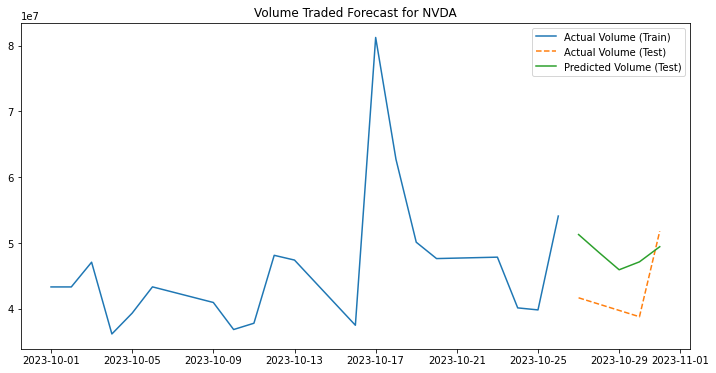

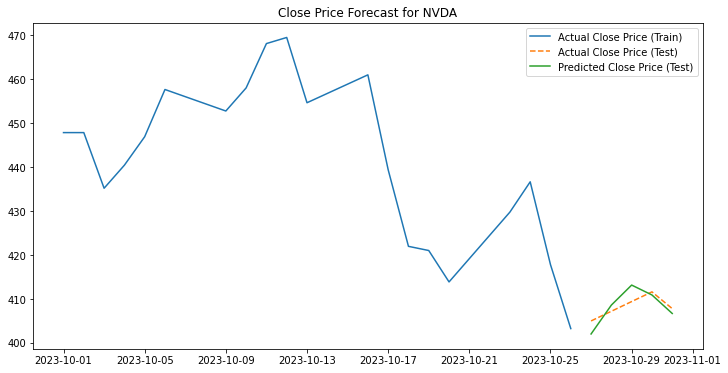

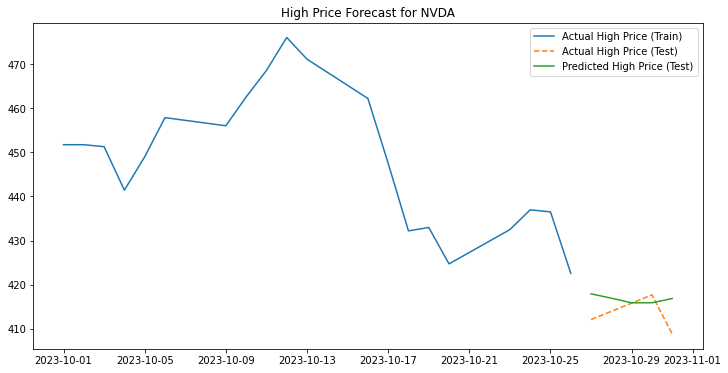

In [275]:
url1 = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/train.csv'
url2 = 'https://raw.githubusercontent.com/supriyouva/Stocks-prediction-using-ML/main/data/test.csv'

df1 = pd.read_csv(url1, parse_dates=['date'], index_col='date')
df2 = pd.read_csv(url2, parse_dates=['date'], index_col='date')

stocks=df1.stock.unique()

for s in ['NVDA']:
  #  stock_data = df[df['stock'] == s]
   # ts = stock_data['volume']
#    start_date = '2023-10-01'
 #   end_date_train = '2023-10-26'
  #  end_date_test = '2023-10-31'
    df_stock_train = df1[df1['stock'] == s]# & (df.index >= start_date) & (df.index <= end_date_train)]
    df_stock_test = df2[df2['stock'] == s]# #& (df.index > end_date_train) & (df.index <= end_date_test)]
    if not df_stock_test.empty:
        features_volume = ['neg', 'pos', 'compound']
        features_price = ['neg', 'pos', 'compound']
        features_high_low = ['neg', 'pos', 'compound']

    #Fit the ARIMA model for traded volume
    order_volume = (5, 1, 0)
    model_volume = ARIMA(df_stock_train['volume'], order=order_volume)
    fit_model_volume = model_volume.fit()
    predictions_volume = fit_model_volume.predict(start=df_stock_test.index[0], end=df_stock_test.index[-1], typ='levels')

    # Fit the ARIMA model for open/close prices
    order_price = (5, 1, 0)
    model_price = ARIMA(df_stock_train['close'], order=order_price)
    fit_model_price = model_price.fit()
    predictions_price = fit_model_price.predict(start=df_stock_test.index[0], end=df_stock_test.index[-1], typ='levels')

    #Fit the ARIMA model for high/low prices

    order_high_low = (5, 1, 0)
    model_high_low = ARIMA(df_stock_train['high'], order=order_high_low)
    fit_model_high_low = model_high_low.fit()
    predictions_high_low = fit_model_high_low.predict(start=df_stock_test.index[0], end=df_stock_test.index[-1],
                                                  typ='levels')
    with PdfPages('volume_prediction_for_'+str(s)+'.pdf') as pdf:
        plt.figure(figsize=(12, 6))
        plt.plot(df_stock_train['volume'], label='Actual Volume (Train)')
        plt.plot(df_stock_test['volume'], label='Actual Volume (Test)', linestyle='--')
        plt.plot(predictions_volume, label='Predicted Volume (Test)')
        plt.title('Volume Traded Forecast for '+str(s))
        plt.legend()
        pdf.savefig()
        plt.show()
        plt.figure(figsize=(12, 6))
        plt.plot(df_stock_train['close'], label='Actual Close Price (Train)')
        plt.plot(df_stock_test['close'], label='Actual Close Price (Test)', linestyle='--')
        plt.plot(predictions_price, label='Predicted Close Price (Test)')
        plt.title('Close Price Forecast for '+str(s))
        plt.legend()
        pdf.savefig()
        plt.show()
        plt.figure(figsize=(12, 6))
        plt.plot(df_stock_train['high'], label='Actual High Price (Train)')
        plt.plot(df_stock_test['high'], label='Actual High Price (Test)', linestyle='--')
        plt.plot(predictions_high_low, label='Predicted High Price (Test)')
        plt.title('High Price Forecast for '+str(s))
        plt.legend()
        pdf.savefig()
        plt.show()


In [260]:
stocks

array(['AAPL', 'ADBE', 'AMZN', 'BAC', 'DIS', 'FB', 'GOOGL', 'HD', 'INTC',
       'JNJ', 'JPM', 'MA', 'MSFT', 'NVDA', 'PYPL', 'TSLA', 'UNH', 'V',
       'VZ', 'XOM'], dtype=object)

## Sarimax by Hy